<big>**Практикум 2.8. Экстремумы функции нескольких переменных**</big>

In [27]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fmin

**Упражнение 1. Постройте линии уровня функции <big>$z=3x^2y+y^3-12x-15y+3$</big> и найдите экстремумы.**

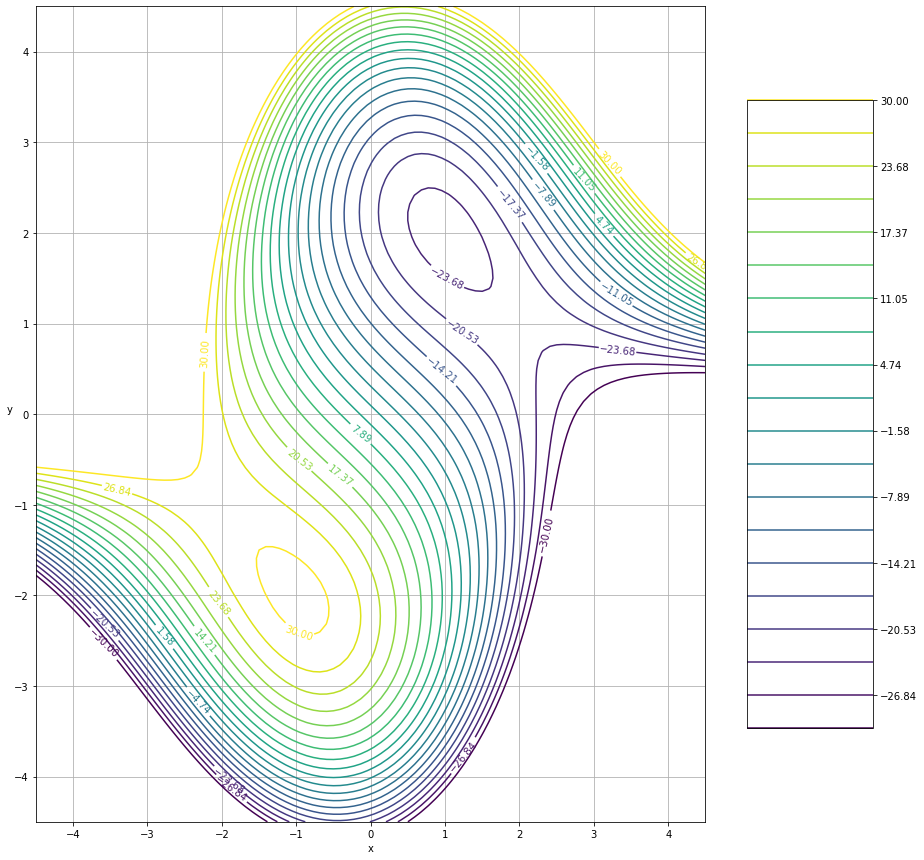

In [28]:
fig = plt.figure(figsize=(15, 15))
x = np.linspace(-4.5, 4.5, 100)
y = np.linspace(-4.5, 4.5, 100)

X, Y = np.meshgrid(x, y)
Z = 3 * X**2 * Y + Y**3 - 12 * X - 15 * Y + 3
ax = fig.add_subplot()
cs = ax.contour(X, Y, Z, levels=np.linspace(-30, 30, 20))
ax.clabel(cs, cs.levels, inline=True, fontsize=10)
plt.colorbar(cs, shrink=0.9, aspect=5)

# параметры координатной плоскости
ax.set_xlabel("x")
ax.set_ylabel("y", rotation=0)
plt.grid()

plt.show()

In [29]:
def f(t):
    x, y = t
    return 3 * x**2 * y + y**3 - 12 * x - 15 * y + 3

minimum, f_min, _, _, _ = fmin(f, np.array([2, 1]), xtol=1e-9, disp=False, full_output=True)

print("Минимум функции в точке:", minimum)
print("Значение функции в точке минимума:", f_min)

Минимум функции в точке: [0.99999998 2.00000002]
Значение функции в точке минимума: -25.0


*Максимум функции в точке $P_0(-1; -2)$.*

**Упражнение 2. Создайте функцию, вычисляющую значения первых и вторых частных производных функции <big>$f(x, y)$</big> в точке <big>$(x_0, y_0)$</big> и значения главных миноров матрицы, составленной из вторых производных.**

In [30]:
def funcInPoint2(f, point):
    return f.subs(x, point[0]).subs(y, point[1])

def diffs_and_minor(f, point):
    x, y = sp.symbols("x y")

    print("Значения частных производных первого порядка в точке:")
    print("dz/dx:", funcInPoint2(sp.diff(f, x), point))
    print("dz/dy:", funcInPoint2(sp.diff(f, y), point))

    print("\nЗначения частных производных второго порядка в точке:")
    print("d2z/dx2:", funcInPoint2(sp.diff(f, x, 2), point))
    print("d2z/dxdy:", funcInPoint2(sp.diff(sp.diff(f, x), y), point))
    print("d2z/dy2:", funcInPoint2(sp.diff(f, y, 2), point))
    
    m1 = sp.Matrix([funcInPoint2(sp.diff(f, x, 2), point)])
    m2 = sp.Matrix([[funcInPoint2(sp.diff(f, x, 2), point), funcInPoint2(sp.diff(sp.diff(f, x), y), point)], [funcInPoint2(sp.diff(sp.diff(f, x), y), point), funcInPoint2(sp.diff(f, y, 2), point)]])
    return sp.det(m1), sp.det(m2)

**Упражнение 3.**

**а) Найти экстремумы функции <big>$z = x^2+y^2-2ln(x)-18ln(y)$</big>.**

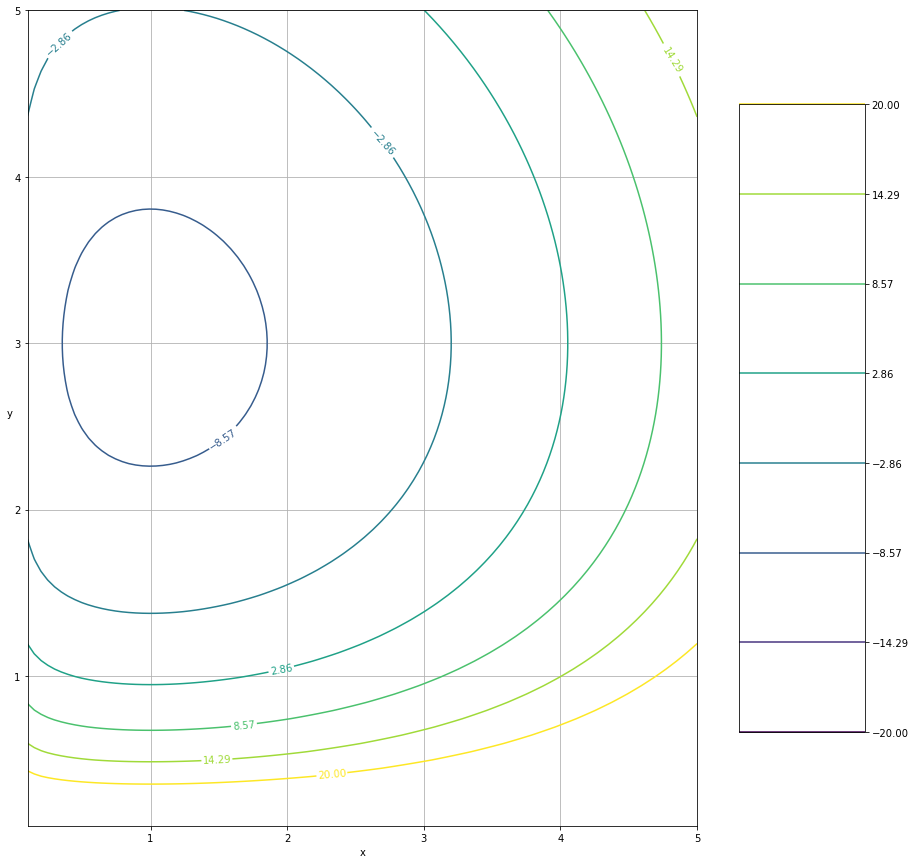

In [31]:
fig = plt.figure(figsize=(15, 15))
x = np.linspace(0.1, 5, 100)
y = np.linspace(0.1, 5, 100)

X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 - 2 * np.log(X) - 18 * np.log(Y)
ax = fig.add_subplot()
cs = ax.contour(X, Y, Z, levels=np.linspace(-20, 20, 8))
ax.clabel(cs, cs.levels, inline=True, fontsize=10)
plt.colorbar(cs, shrink=0.9, aspect=5)

# параметры координатной плоскости
ax.set_xlabel("x")
ax.set_ylabel("y", rotation=0)
plt.grid()

plt.show()

In [32]:
def f(t):
    x, y = t
    return x**2 + y**2 - 2 * np.log(x) - 18 * np.log(y)

minimum, f_min, _, _, _ = fmin(f, np.array([1, 3]), xtol=1e-9, disp=False, full_output=True)

print("Минимум функции в точке:", minimum)
print("Значение функции в точке минимума:", f_min)

Минимум функции в точке: [1. 3.]
Значение функции в точке минимума: -9.775021196025977


**б) С помощью созданной в упражнении 2 функции проверьте выполнение необходимого и достаточного условия экстремума.**

*Необходимое условие экстремума. Если точка <big>$M_0(x_0, y_0)$</big> является станционарной точкой функции <big>$f(x, y)$</big>, то <big>$f'_x(x_0, y_0)=f'_y(x_0, y_0)=0$</big>.*

*Достаточное условие экстремума. Если квадратичная форма, составленная из вторых производных функции, вычисленных в стационарной точке <big>$M_0(x_0, y_0)$</big> положительно определена, то в этой точке функция имеет минимум, если квадратичная форма отрицательно определена, то максимум. Если квадратичная форма является неопределенной, то экстремума в этой точке нет.*

In [33]:
x, y = sp.symbols("x y")
f = x**2 + y**2 - 2 * sp.log(x) - 18 * sp.log(y)
point = [1, 3]

print("\nГлавные миноры:", diffs_and_minor(f, point))

Значения частных производных первого порядка в точке:
dz/dx: 0
dz/dy: 0

Значения частных производных второго порядка в точке:
d2z/dx2: 4
d2z/dxdy: 0
d2z/dy2: 4

Главные миноры: (4, 16)


*Частные производные первого порядка в точке равны нулю (необходимое условие).*

*Квадратичная форма положительно определена: $P_0(1; 3)$ - точка минимума (достаточное условие).*

**Упражнение 4. Создайте функцию, которая находит стационарные точки функции трёх переменных и проверяет выполнение достаточного условия экстремума по критерию Сильвестра.**

In [34]:
def funcInPoint3(f, point):
    return f.subs(x, point[0]).subs(y, point[1]).subs(z, point[2])

def isExtreme(m1, m2, m3):
    if m1 < 0 and m2 > 0 and m3 < 0:
        return "Отрицательно определённая квадратичная форма - точка максимума"
    if m1 > 0 and m2 > 0 and m3 > 0:
        return "Положительно определённая квадратичная форма - точка минимума"
    return "Неопределённая квадратичная форма - не точка экстремума"

def getPoints(f):
    x, y, z = sp.symbols("x y z")
    s = sp.solve([sp.diff(f, x), sp.diff(f, y), sp.diff(f, z)])
    return s

def checkSilvester(f, x, y, z):
    point = [x, y, z]
    x, y, z = sp.symbols("x y z")
    m1 = sp.Matrix([funcInPoint3(sp.diff(f, x, 2), point)])
    m2 = sp.Matrix([[funcInPoint3(sp.diff(f, x, 2), point), funcInPoint3(sp.diff(sp.diff(f, x), y), point)], [funcInPoint3(sp.diff(sp.diff(f, x), y), point), funcInPoint3(sp.diff(f, y, 2), point)]])
    m3 = sp.Matrix([[funcInPoint3(sp.diff(f, x, 2), point), funcInPoint3(sp.diff(sp.diff(f, x), y), point), funcInPoint3(sp.diff(sp.diff(f, x), z), point)], [funcInPoint3(sp.diff(sp.diff(f, y), x), point), funcInPoint3(sp.diff(f, y, 2), point), funcInPoint3(sp.diff(sp.diff(f, y), z), point)], [funcInPoint3(sp.diff(sp.diff(f, z), x), point), funcInPoint3(sp.diff(sp.diff(f, z), y), point), funcInPoint3(sp.diff(f, z, 2), point)]])
    return sp.det(m1), sp.det(m2), sp.det(m3)

**Упражнение 5. Используя функцию из упражнения 4, найдите точки экстремума функции <big>$f=x^3+y^2+z^2+6xy-4z$</big>.**

In [35]:
x, y, z = sp.symbols("x y z")
f = x**3 + y**2 + z**2 + 6 * x * y - 4 * z

for i in range(len(getPoints(f))):
    silv = checkSilvester(f, getPoints(f)[i][x], getPoints(f)[i][y], getPoints(f)[i][z])
    print("Значения главных миноров для точки ", [getPoints(f)[i][x], getPoints(f)[i][y], getPoints(f)[i][z]], ": ", silv, sep="")
    print(isExtreme(silv[0], silv[1], silv[2]))

Значения главных миноров для точки [0, 0, 2]: (0, -36, -72)
Неопределённая квадратичная форма - не точка экстремума
Значения главных миноров для точки [6, -18, 2]: (36, 36, 72)
Положительно определённая квадратичная форма - точка минимума
